<a href="https://colab.research.google.com/github/zhaojin-2001/MMO/blob/main/lab3_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt

# 重置为系统默认英文字体（避免任何中文配置残留）
plt.rcParams.update({
    'font.sans-serif': ['DejaVu Sans', 'Arial', 'Helvetica'],  # 使用系统支持的英文字体
    'axes.unicode_minus': False  # 确保负号正常显示
})

# 清除 Matplotlib 字体缓存（关键步骤！）
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # 确保使用无冲突字体

In [15]:
# 仅在 Google Colab 中需要执行
!sudo apt-get install -y fonts-dejavu  # 安装 DejaVu 字体
!rm -rf ~/.cache/matplotlib  # 清除缓存
exit()  # 重启运行时

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra
The following NEW packages will be installed:
  fonts-dejavu fonts-dejavu-core fonts-dejavu-extra
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 3,085 kB of archives.
After this operation, 10.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-dejavu all 2.37-2build1 [3,192 B]
Fetched 3,085 kB in 1s (3,296 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> 

# **Экспериментальное введение и требования**

**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Требования к отчету:**
Отчет по лабораторной работе должен содержать:

1.   титульный лист;
2.   описание задания;
3.   текст программы;
4.   экранные формы с примерами выполнения программы.

**Задание:**
1.   Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.
2.   Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
*   масштабирование признаков (не менее чем тремя способами);
*   обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);
*   обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);
*   отбор признаков:
   один метод из группы методов фильтрации (filter methods);
   один метод из группы методов обертывания (wrapper methods);
   один метод из группы методов вложений (embedded methods).

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0

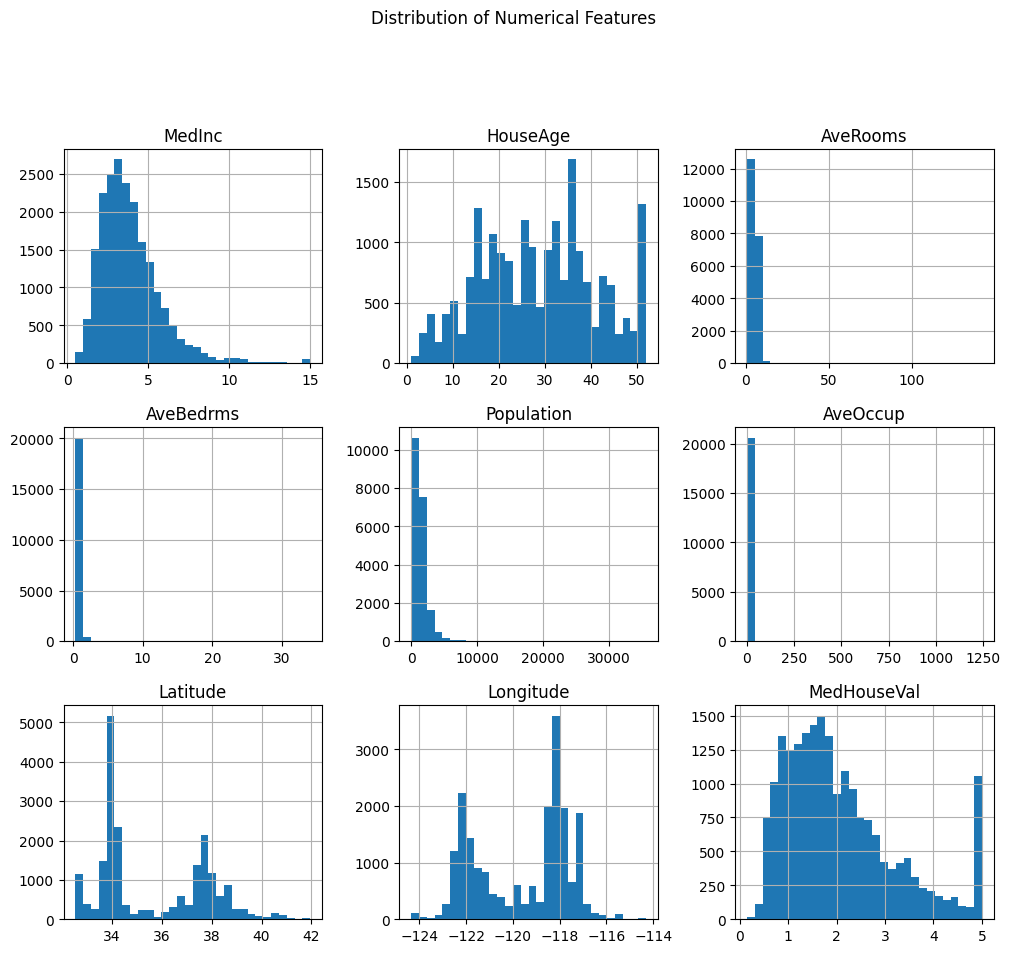

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# 加载数据
data = fetch_california_housing(as_frame=True)
df = data.frame
df['MedHouseVal'] = data.target

# 数据摘要
print("Data Summary:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# 数值型特征分布直方图
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()

# **обработку выбросов для числовых признаков**

Далее мы выбираем числовые признаки для экспериментальной манипуляции. Мы исключаем широту и долготу, а также целевой признак: MedHouseVal

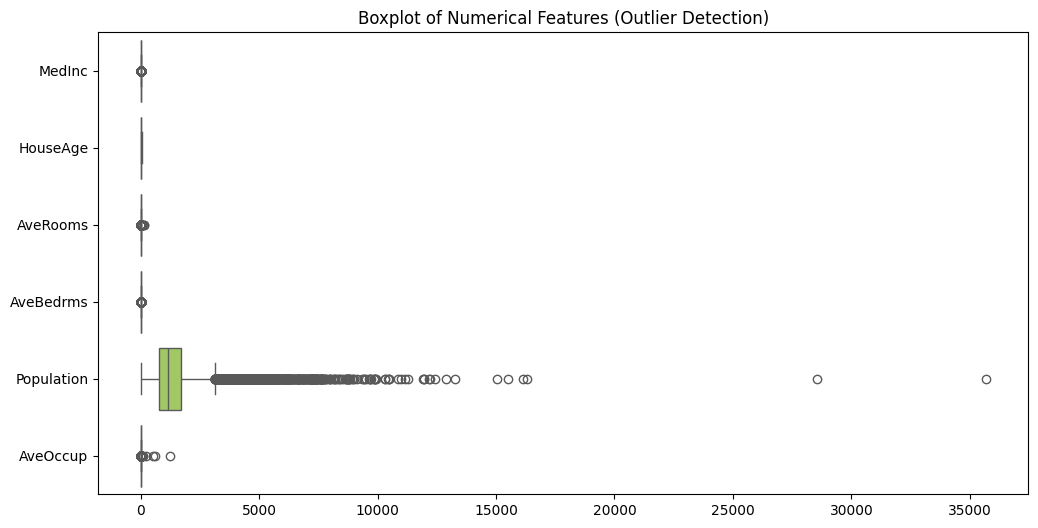

Number of outliers detected by Z-Score: 846
Original data size: 20640, Cleaned data size: 19794


In [5]:
# 定义数值特征
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# 画箱线图检查异常值
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features], orient='h', palette='Set2')
plt.title('Boxplot of Numerical Features (Outlier Detection)')
plt.show()

# Z-Score (阈值threshold = 3)
from scipy import stats
z_scores = np.abs(stats.zscore(df[numeric_features]))
outliers_z = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected by Z-Score: {outliers_z.sum()}")


# IQR删除
df_clean = df[~outliers_z]
print(f"Original data size: {len(df)}, Cleaned data size: {len(df_clean)}")

# **масштабирование признаков (не менее чем тремя способами)**

Далее мы выбираем числовые признаки для масштабирования признаков. Мы исключаем широту и долготу и целевые признаки: MedHouseVal.Мы динамически выбираем лучший метод масштабирования на основе распределения каждой функции и используем графики плотности ядра (KDE) для визуального сравнения изменений распределения до и после масштабирования.

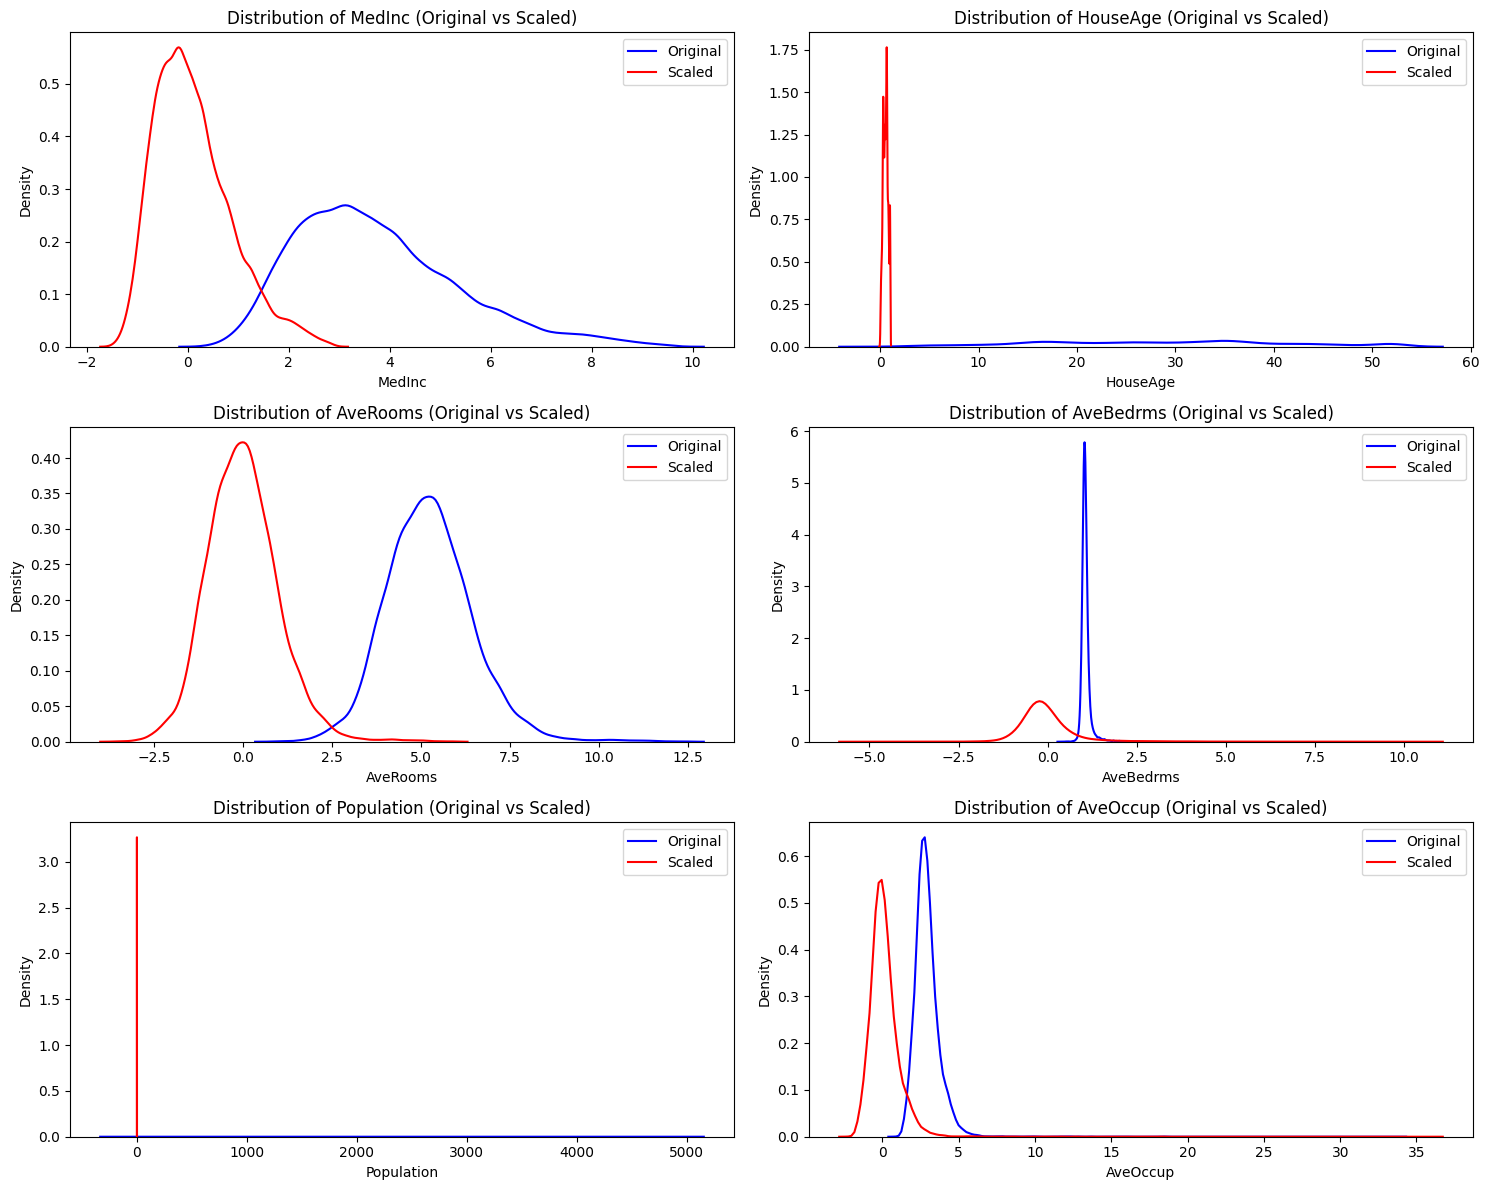

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 根据特征分布选择缩放器
scaler_dict = {
    'MedInc': RobustScaler(),  # 右偏且存在异常值
    'HouseAge': MinMaxScaler(),  # 范围有限，适合归一化
    'AveRooms': StandardScaler(),  # 近似正态分布
    'AveBedrms': StandardScaler(),
    'Population': MinMaxScaler(),  # 右偏 无论使用哪种都是这个图
    'AveOccup': RobustScaler()
}

# 动态缩放
df_scaled = df_clean.copy()
for col, scaler in scaler_dict.items():
    df_scaled[col] = scaler.fit_transform(df_clean[[col]])

# 对比缩放前后分布
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
for i, col in enumerate(numeric_features):
    sns.kdeplot(df_clean[col], ax=axes[i//2, i%2], label='Original', color='blue')
    sns.kdeplot(df_scaled[col], ax=axes[i//2, i%2], label='Scaled', color='red')
    axes[i//2, i%2].set_title(f'Distribution of {col} (Original vs Scaled)')  # 英文标题
    axes[i//2, i%2].legend()
plt.tight_layout()
plt.show()

После масштабирования функция «Население» меняется с горизонтальной линии на вертикальную, поэтому мы рассмотрим эту функцию подробно. Мы обнаружили, что характеристика популяции представляет собой типичное распределение с правым скосом. Использование StandardScaler или MinMaxScaler может усилить влияние выбросов, в результате чего масштабированное распределение станет вертикальной линией.

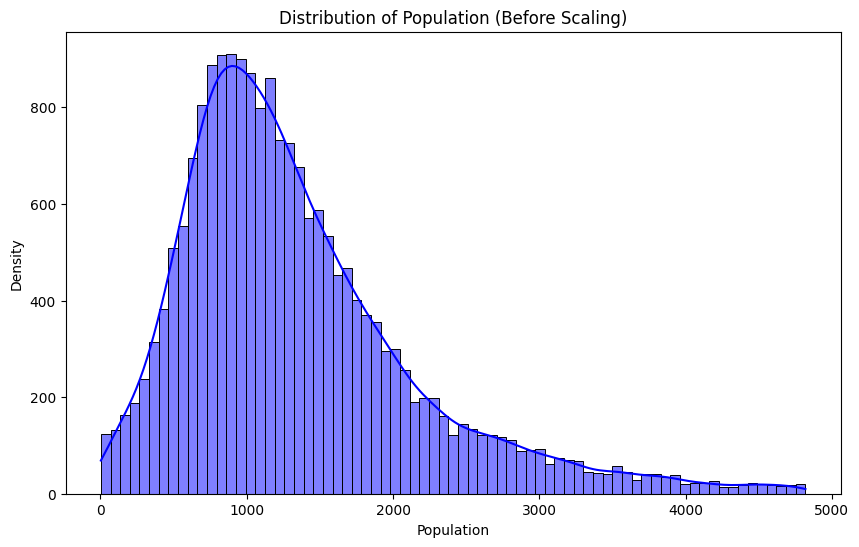

In [9]:
# 检查 Population 特征的分布
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Population'], kde=True, color='blue')
plt.title('Distribution of Population (Before Scaling)')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()

Для распределения населения с правым скосом мы сначала выполним логарифмическое преобразование, а затем масштабируем его с помощью RobustScaler.

<ipython-input-16-2d7dd7dd0e74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Population_log'] = np.log1p(df_clean['Population'])


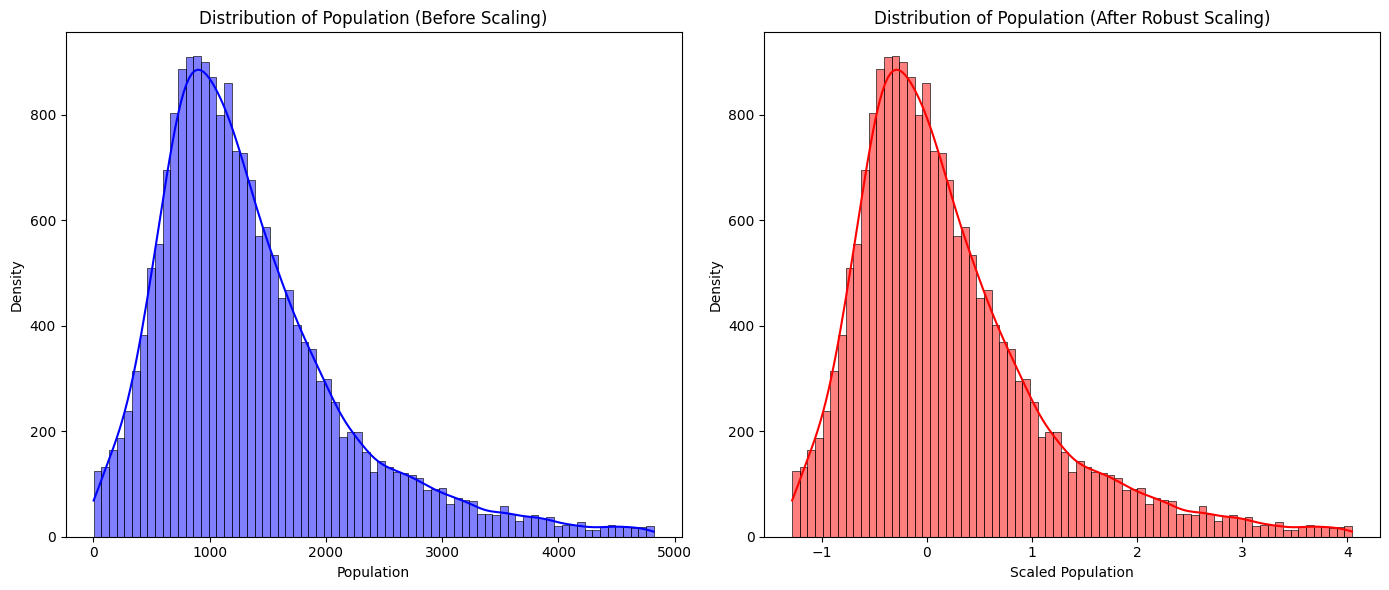

In [16]:
# 1. 对数变换（动态处理右偏分布）
df_clean['Population_log'] = np.log1p(df_clean['Population'])

# 2. 动态缩放（根据特征分布选择缩放器）
scaler_dict = {
    'Population': RobustScaler()  # 使用 RobustScaler 处理右偏分布
}

# 动态缩放
df_scaled = df_clean.copy()
for col, scaler in scaler_dict.items():
    df_scaled[col] = scaler.fit_transform(df_clean[[col]])

# 3. 对比缩放前后分布
plt.figure(figsize=(14, 6))

# 原始分布
plt.subplot(1, 2, 1)
sns.histplot(df_clean['Population'], kde=True, color='blue', label='Original')
plt.title('Distribution of Population (Before Scaling)')
plt.xlabel('Population')
plt.ylabel('Density')

# 缩放后分布
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['Population'], kde=True, color='red', label='Scaled')
plt.title('Distribution of Population (After Robust Scaling)')
plt.xlabel('Scaled Population')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# **обработку по крайней мере одного нестандартного признака**

Здесь мы хотим преобразовать долготу и широту в географические кластерные признаки, поэтому мы используем алгоритм кластеризации K-средних для кластеризации долготы и широты в наборе данных и визуализируем результаты кластеризации.

<ipython-input-17-af9b6af07cd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['GeoCluster'] = kmeans.fit_predict(coords)


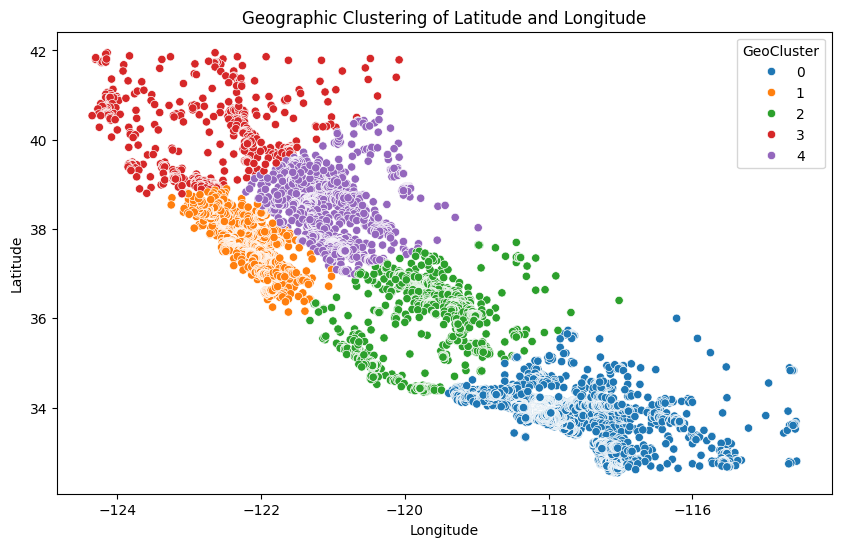

In [17]:
from sklearn.cluster import KMeans

# 使用K-Means对经纬度聚类
coords = df_clean[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df_clean['GeoCluster'] = kmeans.fit_predict(coords)

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='GeoCluster', data=df_clean, palette='tab10')
plt.title('Geographic Clustering of Latitude and Longitude')  # 英文标题
plt.xlabel('Longitude')  # 英文标签
plt.ylabel('Latitude')   # 英文标签
plt.show()

# 删除原始经纬度，保留聚类标签
df_processed = df_clean.drop(['Latitude', 'Longitude'], axis=1)

# **отбор признаков**

Мы использовали метод SelectKBest в методе фильтра в сочетании с функцией оценки f_regression, чтобы выбрать пять признаков с самой высокой корреляцией с целевой переменной MedHouseVal из набора данных и визуализировали оценки корреляции этих признаков.

<ipython-input-21-e4c8e793c06a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=df_processed.drop('MedHouseVal', axis=1).columns, palette='viridis')


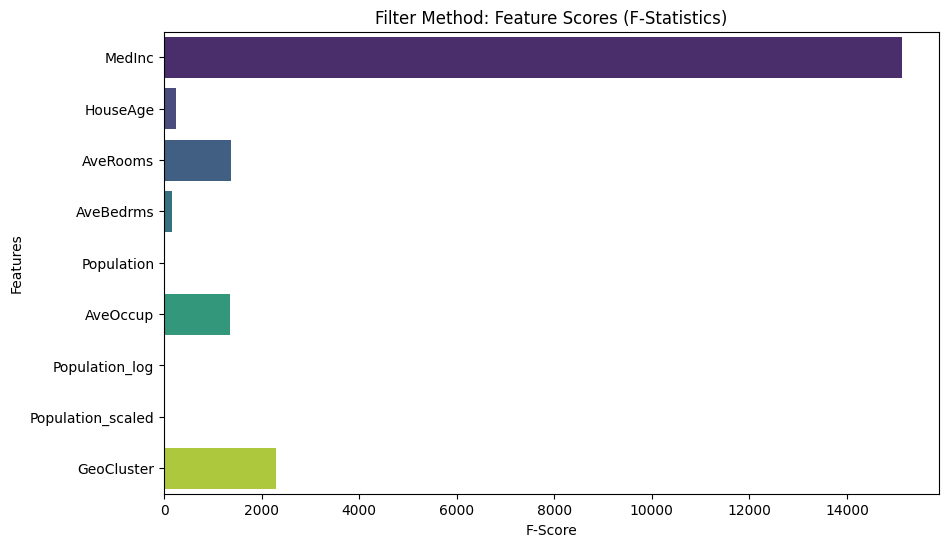

Selected features by Filter Method: ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'GeoCluster']


In [21]:
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# 过滤法：选择与目标相关性最高的5个特征
def filter_method_selection():
    # 特征选择
    selector_kbest = SelectKBest(score_func=f_regression, k=5)
    X_kbest = selector_kbest.fit_transform(df_processed.drop('MedHouseVal', axis=1), df_processed['MedHouseVal'])
    selected_features = df_processed.drop('MedHouseVal', axis=1).columns[selector_kbest.get_support()]

    # 可视化相关性分数
    scores = selector_kbest.scores_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=df_processed.drop('MedHouseVal', axis=1).columns, palette='viridis')
    plt.title('Filter Method: Feature Scores (F-Statistics)')
    plt.xlabel('F-Score')
    plt.ylabel('Features')
    plt.show()

    return selected_features

selected_kbest = filter_method_selection()
print("Selected features by Filter Method:", selected_kbest.tolist())

Здесь для выбора признаков используется регрессия Лассо во встроенном методе. Лассо-регрессия автоматически снижает коэффициенты некоторых признаков до 0 посредством регуляризации L1, тем самым достигая отбора признаков.

<ipython-input-22-10a3f2fe3036>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso.coef_, y=df_processed.drop('MedHouseVal', axis=1).columns, palette='coolwarm')


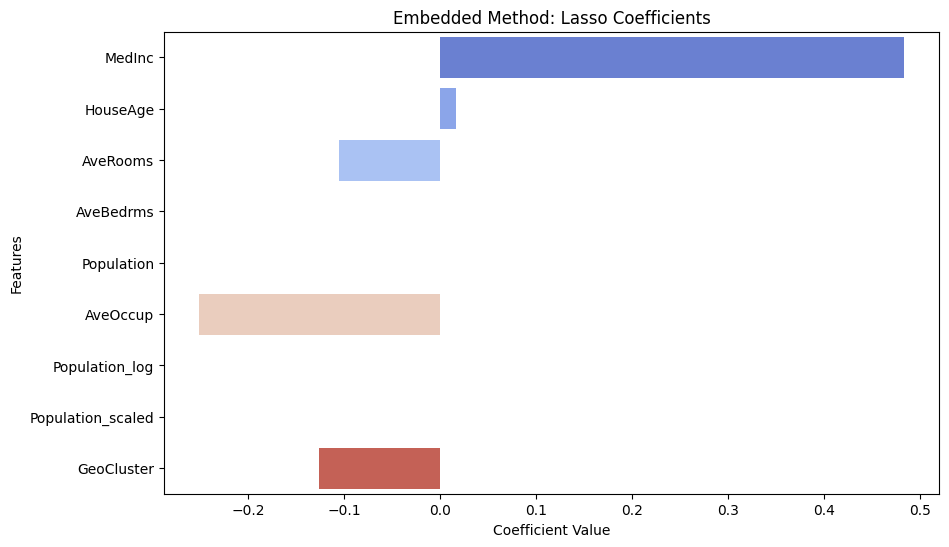

Selected features by Embedded Method: ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'GeoCluster']


In [22]:
from sklearn.linear_model import LassoCV

# 嵌入法：Lasso回归选择特征
def embedded_method_selection():
    # 特征选择
    lasso = LassoCV(cv=5, max_iter=1000)  # 减少 max_iter 以加速收敛
    lasso.fit(df_processed.drop('MedHouseVal', axis=1), df_processed['MedHouseVal'])
    selected_features = df_processed.drop('MedHouseVal', axis=1).columns[lasso.coef_ != 0]

    # 可视化Lasso系数
    plt.figure(figsize=(10, 6))
    sns.barplot(x=lasso.coef_, y=df_processed.drop('MedHouseVal', axis=1).columns, palette='coolwarm')
    plt.title('Embedded Method: Lasso Coefficients')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()

    return selected_features

selected_lasso = embedded_method_selection()
print("Selected features by Embedded Method:", selected_lasso.tolist())

Здесь мы используем метод случайного леса в обертке для оценки важности признаков и выбора признаков с показателями важности выше порогового значения.

<ipython-input-23-d0372db6be82>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=df_processed.drop('MedHouseVal', axis=1).columns, palette='viridis')


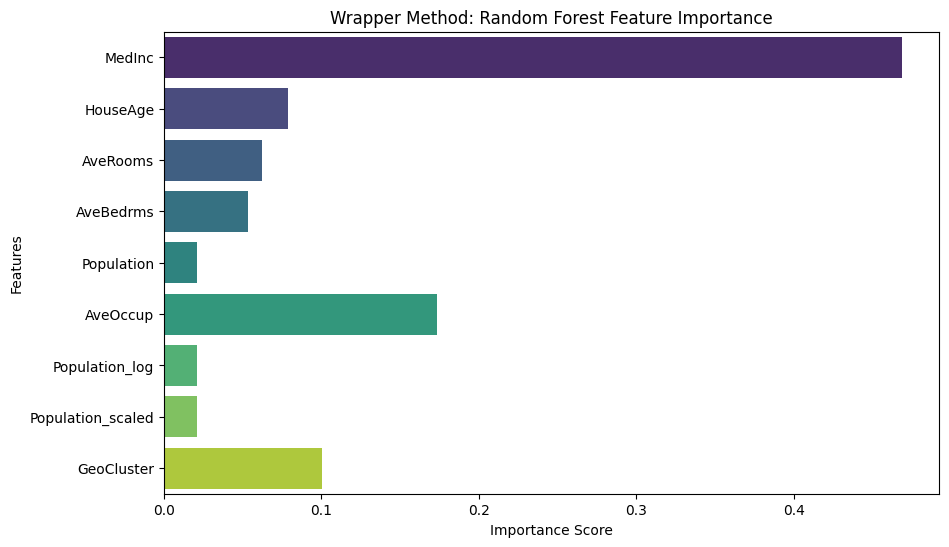

Selected features by Wrapper Method: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'GeoCluster']


In [23]:
from sklearn.ensemble import RandomForestRegressor

# 包装法：随机森林特征重要性
def wrapper_method_selection():
    # 特征选择
    rf = RandomForestRegressor(n_estimators=50, random_state=42)  # 减少树的数量以加速训练
    rf.fit(df_processed.drop('MedHouseVal', axis=1), df_processed['MedHouseVal'])
    importance = rf.feature_importances_
    selected_features = df_processed.drop('MedHouseVal', axis=1).columns[importance > 0.05]

    # 可视化特征重要性
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=df_processed.drop('MedHouseVal', axis=1).columns, palette='viridis')
    plt.title('Wrapper Method: Random Forest Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

    return selected_features

selected_rf = wrapper_method_selection()
print("Selected features by Wrapper Method:", selected_rf.tolist())